In [2]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random

$$Exercice 1$$

In [65]:
def uniforme_continue(a,b):
    return(b-a)*random.random()+a
for i in range(10):
    print (uniforme_continue(1,2))

1.0623000823610793
1.4741674875099946
1.2457756355628236
1.4481842247008854
1.8153724273106215
1.3982641597676695
1.7628242884735341
1.5816080025951793
1.4688082630324573
1.9334600897224823


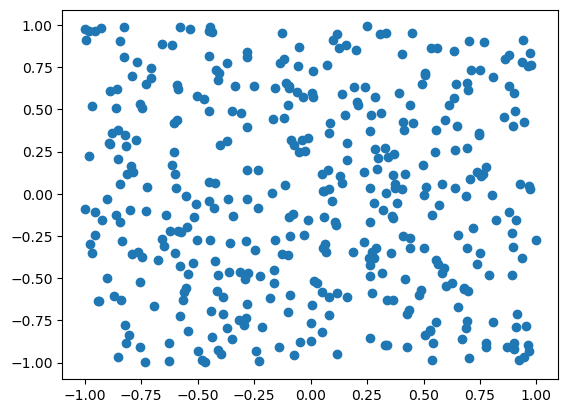

In [4]:
def test_disque(N):
    Z = np.zeros((2,N))
    for i in range(N):
        Z[0,i]=uniforme_continue(-1,1)
        Z[1,i]=uniforme_continue(-1,1)
    return Z


test_disque(4)


N=400
D=test_disque(N)
plt.scatter(D[0],D[1])

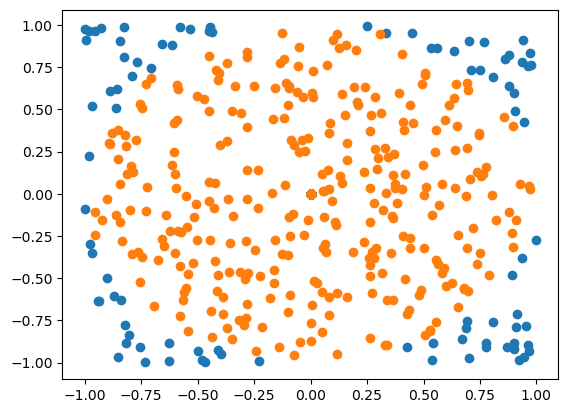

In [5]:
def f(k,Z):
    S=0
    for i in range(k):
        if (Z[0,i]**2+Z[1,i]**2)<=1:
            S+=1
    return (1/k)*S


Zplus=np.zeros((2,N))
Zmoins=np.zeros((2,N))
for i in range(N):
    if (D[0,i]**2+D[1,i]**2)<=1:
        Zmoins[0,i]=D[0,i]
        Zmoins[1,i]=D[1,i]
    else:
        Zplus[0,i]=D[0,i]
        Zplus[1,i]=D[1,i]

plt.scatter(Zplus[0,:],Zplus[1,:])
plt.scatter(Zmoins[0,:],Zmoins[1,:])

$$Exercice 2$$

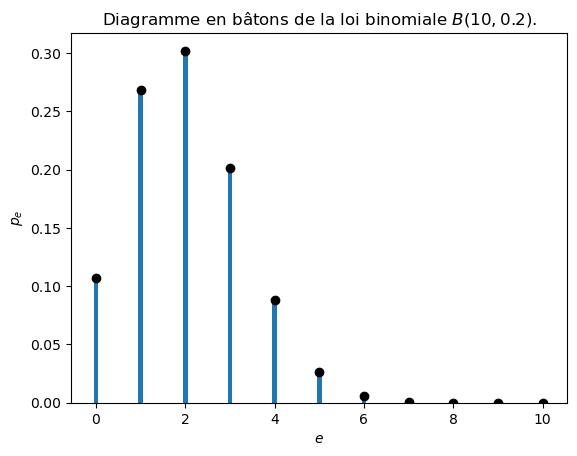

In [6]:
n = 10
p = 0.2
x = np.array(range(n+1))
y = [math.comb(n,i) * (1-p)**(n-i) * p**i for i in x]
width = 0.1
fig = plt.figure()
plt.bar(x, y, width, align="center")
plt.scatter(x, y, color="black")
plt.xlabel("$e$")
plt.ylabel("$p_e$")
plt.title(f"Diagramme en bâtons de la loi binomiale $B({n},{p})$.")
plt.show()

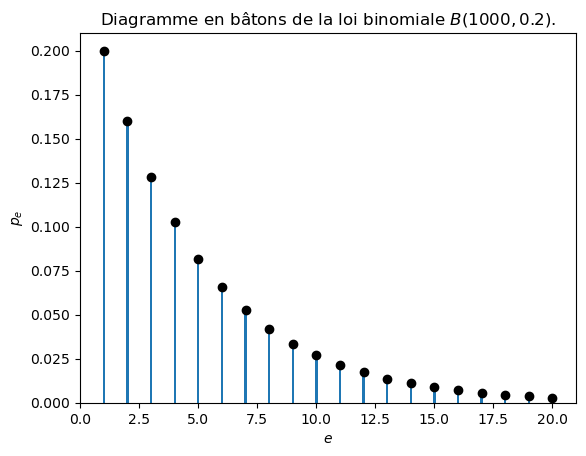

In [79]:
def geom(p,x):
    P = np.zeros(x.size)
    for k in x:
        P[k-1] = (1 - p)**(k-1) * p
    return P  

m = 20
p = 0.2
x = np.arange(1,m+1)
y = geom(p,x)
width = 0.1
fig = plt.figure()
plt.bar(x, y, width, align="center")
plt.scatter(x, y, color="black")
plt.xlabel("$e$")
plt.ylabel("$p_e$")
plt.title(f"Diagramme en bâtons de la loi binomiale $B({n},{p})$.")
plt.show()

In [80]:
def m(p):
    k = 1
    P = 1
    while P>0.05:
        P -= (1-p)**(k-1)*p
        k += 1
    return k

In [81]:
P = [0.2,0.3,0.4,0.5,0.6]
M = []
for p in P:
    M.append(m(p))
print(M)

[15, 10, 7, 6, 5]


$$Exercice 3$$

In [111]:
def simuleY():
    X1 = int(uniforme_continue(1,7)) 
    X2 = int(uniforme_continue(1,7)) 
    X3 = int(uniforme_continue(1,7)) 
    return max(X1,X2,X3)

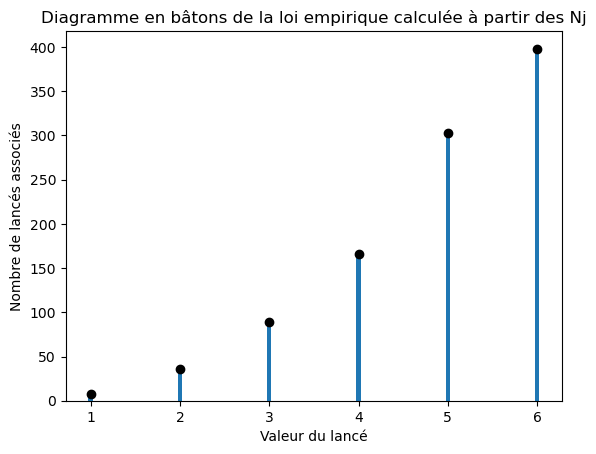

In [146]:
n = 1000
N = np.zeros(6)
for i in range(n):
    y = simuleY()
    N[y-1] += 1  

x = np.arange(1,7)    
fig = plt.figure()
width = 0.05
plt.bar(x, N, width, align="center")
plt.scatter(x, N, color="black")
plt.xlabel("Valeur du lancé")
plt.ylabel("Nombre de lancés associés")
plt.title(f"Diagramme en bâtons de la loi empirique calculée à partir des Nj")
plt.show()

$$Exercice 4$$

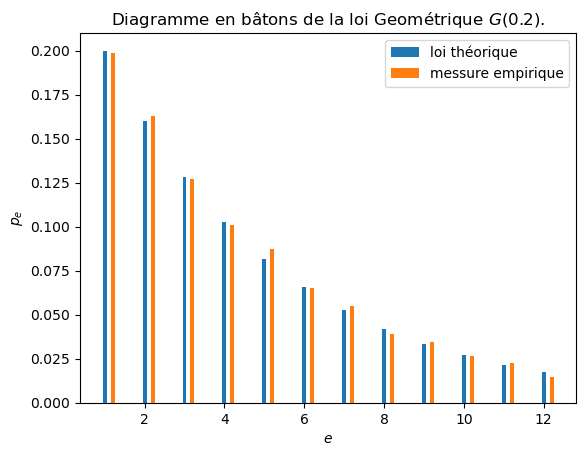

In [185]:
def geometrique1(p):
    U = uniforme_continue(0,1)
    a = 0
    k = 0
    while a < U :
        k += 1 
        pk = p*(1-p)**(k-1)
        a += pk
    return k
   
def Graph(f,p,m):
    x = np.arange(1,m+1)
    y = geom(p,x)
    width = 0.1
    n=10000
    card = np.zeros(m)
    for i in range(n):
        val = f(p)
        if val<=m:
            card[val-1] += 1  
    
    
    fig = plt.figure()
    plt.bar(x, y, width, align="center", label ='loi théorique')
    plt.bar(x+0.2, card/n, width, align="center", label = 'messure empirique')
    plt.xlabel("$e$")
    plt.ylabel("$p_e$")
    plt.title(f"Diagramme en bâtons de la loi Geométrique $G({p})$.")
    plt.legend()
    plt.show()
    
p = 0.2
m = 12
Graph(geometrique1,p,m)


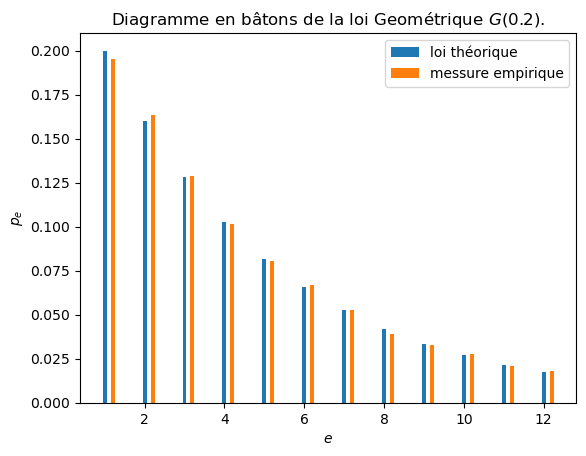

In [186]:
def geometrique2(p):
    Bern = uniforme_continue(0,1)
    k = 1
    while p < Bern :
        k += 1 
        Bern = uniforme_continue(0,1)
    return k

p = 0.2
m = 12
Graph(geometrique2,p,m)


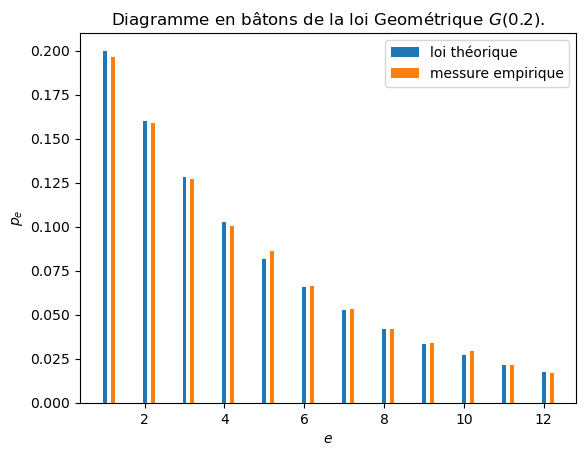

In [187]:
def geometrique3(p):
    lamb = -(math.log(1 - p))**(-1)
    U = uniforme_continue(0,1)
    return math.ceil(-lamb*math.log(U))

p = 0.2
m = 12
Graph(geometrique3,p,m)


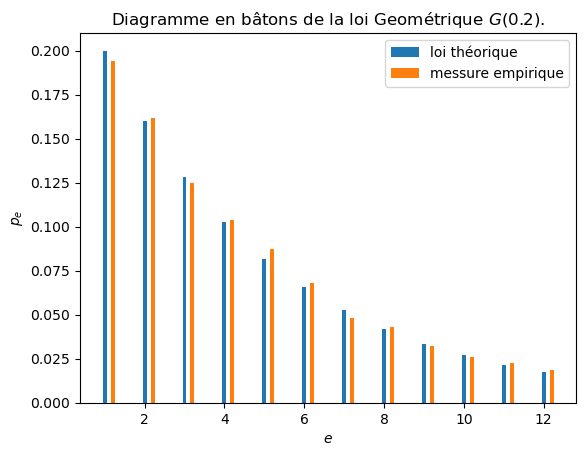

In [188]:
def geometrique4(p):
    return np.random.geometric(p) #scs.geom.rvs(p) autre fonction

p = 0.2
m = 12
Graph(geometrique4,p,m)


In [193]:
from time import time

for i,f in enumerate([geometrique1,geometrique2 ,geometrique3 ,geometrique4 ]):
    N = 10000000
    p = 0.5
    t1 = time()
    [f(p) for i in range(N)]
    t2 = time()
    temps1 = t2 - t1
    print(f"La méthode {i+1} a pris {temps1} secondes.")

La méthode 1 a pris 15.685697793960571 secondes.
La méthode 2 a pris 19.179335355758667 secondes.
La méthode 3 a pris 18.519243001937866 secondes.
La méthode 4 a pris 14.649445533752441 secondes.
